#Ejercicio datasets IRIS

##Importando librerias y dataset

In [18]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error

###Cargamos los datos del dataset

In [2]:
db_iris = load_iris()

In [ ]:
#imprimiento la descripcion del dataset
print(db_iris.DESCR)
#imprimiento datos del target
print(db_iris.target)

Verificando si hay datos nulos

In [9]:
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

###Convirtiendo el dataset en un dataframe

In [5]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target'] = db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###Generando el arbol y entrenando

Instanciamos el arbol

In [25]:
arbol = DecisionTreeClassifier()

Dividimos los datos(Train y test)

In [26]:
#dividiremos el dataset en  70% (train) y 30% (test)
x_train, x_test, y_train, y_test = train_test_split(df_iris[db_iris.feature_names], df_iris['target'],test_size=0.3, random_state=0)

Entrenamos

In [27]:
arbol.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Graficamos para ver la profundidad optima

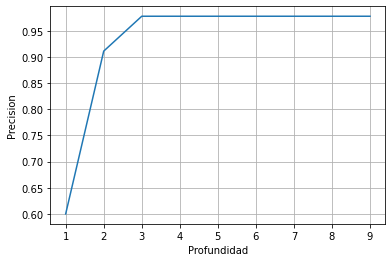

In [28]:
max_depth_lista = list(range(1, 10))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(x_train, y_train)
    score = arbol_clasi.score(x_test, y_test)
    accuracy.append(score)

# Graficamos los resultados 

plt.plot(max_depth_lista,accuracy)
plt.ylabel('Precision')
plt.xlabel('Profundidad')
plt.grid(True)
plt.show()

Precicion 

In [38]:
arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 0)

arbol_clasi.fit(x_train, y_train)

accuary = arbol_clasi.score(x_test, y_test)
#calcular la precisión (accuary) del algoritmo
print("Precision: "+str(accuary*100)+" %")
print("Puntaje del entrenamiento: ", arbol_clasi.score(x_train,y_train)*100,"%\n\n")

print("\t\tDatos recolectados del entrenamiento\n")
y_pred = arbol_clasi.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred),"\n")



Precision: 97.77777777777777 %
Puntaje del entrenamiento:  98.09523809523809 %


		Datos recolectados del entrenamiento

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]] 



Generando el arbol

In [30]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

#Ejercicio dataset Salary_Data